In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
quality_mapping ={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
df.loc[:,"quality"] = df.quality.map(quality_mapping)
df.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [4]:
#reset the indices
df = df.sample(frac=1).reset_index(drop=True)

#top 1000 for training
#df_training = df.iloc[:1000,:]
df_train = df.head(1000)

#bottom 599 for testing
df_test = df.tail(599)

df_train.shape , df_test.shape

((1000, 12), (599, 12))

In [5]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity',
         'volatile acidity',
         'citric acid',
        'residual sugar',
     'chlorides',
     'free sulfur dioxide',
     'total sulfur dioxide',
     'density',
     'pH',
     'sulphates',
     'alcohol']

In [6]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
train_pred = clf.predict(df_train[cols])
test_pred = clf.predict(df_test[cols])

print("train accuracy",metrics.accuracy_score(train_pred , df_train.quality))

print("testing accuracy",metrics.accuracy_score(test_pred , df_test.quality))

train accuracy 0.585
testing accuracy 0.5742904841402338


In [8]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(df_train[cols],df_train.quality)

train_pred = clf.predict(df_train[cols])
test_pred = clf.predict(df_test[cols])

print("train accuracy",metrics.accuracy_score(train_pred , df_train.quality))

print("testing accuracy",metrics.accuracy_score(test_pred , df_test.quality))

train accuracy 0.765
testing accuracy 0.6026711185308848


# Now do some code

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#global size for the plot
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

In [11]:
train_accuracies = [0.5]
test_accuracies = [0.5]

for i in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(df_train[cols],df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
     df_train.quality, train_predictions)
    
    test_accuracy = metrics.accuracy_score(
     df_test.quality, test_predictions)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

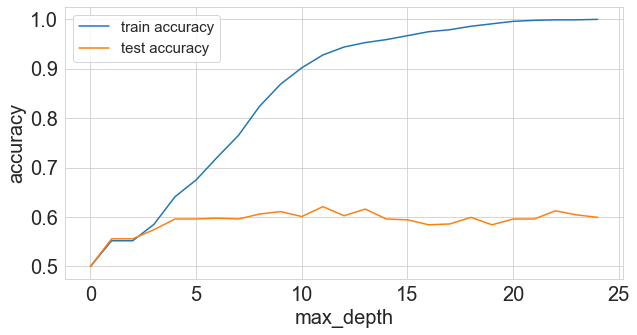

In [12]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## Now do some cross validation

In [13]:
from sklearn import model_selection

In [15]:
if __name__ =="__main__":
    df = pd.read_csv("winequality-red.csv")
    df["kfold"] =-1
    df = df.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.KFold(n_splits=5)
    
    for fold , (trn_,val_) in enumerate(kf.split(X=df)):
        df.loc[val_,'kfold'] = fold
    df.to_csv('kfold_dataset.csv',index=False)

## Stratified fold

In [16]:
if __name__ =="__main__":
    df = pd.read_csv("winequality-red.csv")
    df["kfold"] =-1
    df = df.sample(frac=1).reset_index(drop=True)
    y = df.quality.values
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for fold , (trn_,val_) in enumerate(kf.split(X=df,y=y)):
        df.loc[val_,'kfold'] = fold
    df.to_csv('stratifiedfold_dataset.csv',index=False)

Text(0, 0.5, 'count')

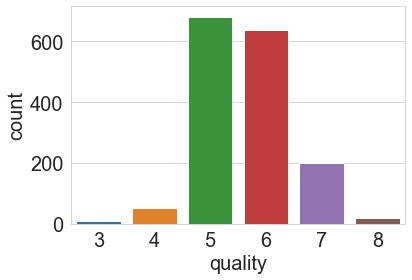

In [17]:
b = sns.countplot(x='quality',data=df)
b.set_xlabel('quality',fontsize=20)
b.set_ylabel('count',fontsize=20)

In [19]:
df.kfold.value_counts()

0    322
2    321
1    321
3    318
4    317
Name: kfold, dtype: int64

In [21]:
train = df[df['kfold']!=0]
val = df[df['kfold']==0]
train.shape , val.shape

((1277, 13), (322, 13))

In [23]:
train.quality.value_counts()

5    544
6    510
7    159
4     42
8     14
3      8
Name: quality, dtype: int64

In [25]:
for i in range(5):
    train = df[df['kfold']!=i]
    val = df[df['kfold']==i]
    clf = tree.DecisionTreeClassifier(max_depth=9)
    clf.fit(train[cols],train.quality)
    pr = clf.predict(train[cols])
    va = clf.predict(val[cols])
    print('fold {}'.format(i+1))
    print('training accuracy {}'.format(metrics.accuracy_score(pr,
                                                train.quality)))
    
    print('validation accuracy {}'.format(metrics.accuracy_score(va,
                                                val.quality)))

fold 1
training accuracy 0.8543461237274863
validation accuracy 0.6149068322981367
fold 2
training accuracy 0.8364632237871674
validation accuracy 0.6105919003115264
fold 3
training accuracy 0.8528951486697965
validation accuracy 0.616822429906542
fold 4
training accuracy 0.7985948477751756
validation accuracy 0.6509433962264151
fold 5
training accuracy 0.84399375975039
validation accuracy 0.637223974763407


In [27]:
kf = model_selection.StratifiedKFold(n_splits=5)
pred_test_full =0
cv_score =[]
i=1
X = df[cols]
y = df.quality

for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = tree.DecisionTreeClassifier(max_depth=9)
    lr.fit(xtr,ytr)
    sc = metrics.accuracy_score(ytr,lr.predict(xtr))
    print('validation acc:',sc)
    score = metrics.accuracy_score(yvl,lr.predict(xvl))
    print('validation acc:',score)
    

1 of KFold 5
validation acc: 0.8535630383711824
validation acc: 0.6055900621118012
1 of KFold 5
validation acc: 0.8364632237871674
validation acc: 0.6199376947040498
1 of KFold 5
validation acc: 0.8536776212832551
validation acc: 0.6074766355140186
1 of KFold 5
validation acc: 0.7985948477751756
validation acc: 0.6289308176100629
1 of KFold 5
validation acc: 0.8416536661466458
validation acc: 0.6246056782334385


## stratified kfold for regression

In [36]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    data['kfold'] = -1
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(np.floor(1+np.log2(len(data))))
    
    data.loc[:,"bins"] = pd.cut(data["target"],
                                bins=num_bins,labels=False)
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f,(t_,v_) in enumerate(kf.split(X=data,
                                        y=data.bins.values)):
        data.loc[v_,'kfold'] = f
    data = data.drop("bins",axis=1)
    return data
if __name__ =="__main__":
    X,y = datasets.make_regression(
            n_samples=15000,n_features=100,n_targets=1)
    df = pd.DataFrame(X,
                columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:,"target"] =y
    
    df = create_folds(df)

C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
